# Toxic text classification with NLU



# 1. Install Java and


In [1]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu

# 2. Load toxic model and predict classes for sample string

In [3]:
import nlu
sarcasm_pipe  = nlu.load('en.classify.toxic')
sarcasm_pipe.predict('gotta love the teachers who give exams on the day after halloween')

multiclassifierdl_use_toxic download started this may take some time.
Approximate size to download 11.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


sentence_embeddings  ... category
origin_index                                                     ...         
0             [-0.05071105435490608, 0.038035523146390915, 0...  ...       []

[1 rows x 3 columns]

# 3. Download sample dataset

In [4]:
# Download the dataset 
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp
import pandas as pd
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')


# 4. Predict on pandas dataset and visualize predictions



In [8]:
sarcasm_pipe  = nlu.load('en.classify.toxic')
df['text'] = df['comment']
sarcasm_predictions = sarcasm_pipe.predict(df['text'].iloc[0:1000], output_level='sentence')
sarcasm_predictions

multiclassifierdl_use_toxic download started this may take some time.
Approximate size to download 11.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


sentence_embeddings  ...          category
origin_index                                                     ...                  
0             [-0.06570463627576828, -0.03522053360939026, -...  ...                []
1             [-0.0254225991666317, 0.05448468029499054, -0....  ...                []
2             [-0.0035701016895473003, -0.030124755576252937...  ...                []
3             [0.06464719027280807, -0.023972542956471443, -...  ...                []
4             [0.028676817193627357, 0.0199710875749588, 0.0...  ...                []
...                                                         ...  ...               ...
995           [-0.04123315587639809, 0.049579471349716187, -...  ...                []
996           [0.0263528935611248, -0.06056991219520569, -0....  ...                []
997           [0.07649341225624084, 0.05448545515537262, -0....  ...                []
998           [0.049849480390548706, -0.054164644330739975, ...  ...  [toxic, obscene]
999           [-0.050827838480472565, -0.045025844126939774,...  ...                []

[1207 rows x 3 columns]

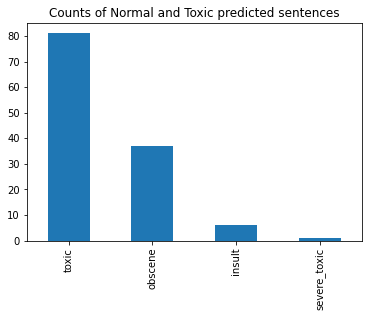

In [9]:
sarcasm_predictions.explode('category').category.value_counts().plot.bar(title='Counts of Normal and Toxic predicted sentences')